<a href="https://colab.research.google.com/github/BikashPandey17/handsFreeKeyboard_CNN/blob/deep/a_z_trainer_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---- at4_deep.py ----
*   adding images from drive for each person
*   images uploaded are already preprocessed
*   drive is mounted using Google OAuth v2.0
*   images are resized
*   dataset is increased by flipping images
*   final list is prepared by concatenating all the smaller lists




In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing data set 
import cv2, glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [0]:
import h5py
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import regularizers, optimizers
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import cv2

from scipy import misc
from skimage import color
from skimage import io
from skimage import filters
from skimage import img_as_float
from sklearn.utils import shuffle

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.models import Sequential
%matplotlib inline

Using TensorFlow backend.


Defining size of each numpy array and final list size
INISTIALIZATION

In [0]:
!unzip "/content/drive/My Drive/orig_final_threshold_processed_lab2.zip"

Archive:  /content/drive/My Drive/orig_final_threshold_processed_lab2.zip
   creating: orig_final_threshold_processed_lab2/
   creating: orig_final_threshold_processed_lab2/a/
  inflating: orig_final_threshold_processed_lab2/a/a1.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a2.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a3.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a5.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a7.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a8.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a12.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a13.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a14.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a15.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a16.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a19.jpg  
  inflating: orig_final_threshold_processed_lab2/a/a20.jpg  
  inflating: orig_final_threshold_pro

In [0]:
classifier = 28
iterate = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","e1","e2"]

In [0]:
#get count

def get_count_t(classifer,iterate):
  count_t=0
  i=0
  j=0
  for j in range(classifier):
    count_t = count_t+len(glob.glob("/content/orig_final_threshold_processed_lab2/"+iterate[j]+"/*.jpg"))
  return count_t
    

In [0]:
count_t = get_count_t(classifier,iterate)
print(count_t)
#count_c = get_count_c(classifier,iterate)
#print(count_c)
#count_n = get_count_n(classifier,iterate)
#print(count_n)

44824


In [0]:
X_train_t = np.ndarray(shape = (count_t,64,64))
Y_train_t = np.ndarray(shape = (count_t), dtype=np.int32)

In [0]:
#load data set threshold
def load_data_t(iterate, classifier):
  i=0
  j=0
  count = int(count_t/classifier)
  for j in range(classifier):
    #print(iterate[j]+" count = "+str(count_t[j]))
    z=1
    for img in glob.glob("/content/orig_final_threshold_processed_lab2/"+iterate[j]+"/*.jpg"):
      cv_img = cv2.imread(img, 0)
      re = cv2.resize(cv_img , (64,64))
      if z <= count:
        X_train_t[i] = re
        Y_train_t[i] = j
        
      i=i+1
    print(iterate[j]+" done ")
  return X_train_t, Y_train_t

In [0]:
X_train_t, Y_train_t = load_data_t(iterate, classifier)

a done 
b done 
c done 
d done 
e done 
f done 
g done 
h done 
i done 
j done 
k done 
l done 
m done 
n done 
o done 
p done 
q done 
r done 
s done 
t done 
u done 
v done 
w done 
x done 
y done 
z done 
e1 done 
e2 done 


3


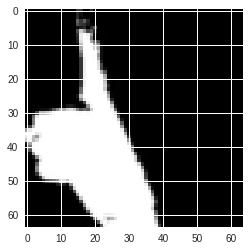

In [0]:
plt.imshow(X_train_t[5001],cmap='gray')
print(Y_train_t[5001])

In [0]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    ### START CODE HERE ###
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name='C')
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return one_hot

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_t, Y_train_t, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35859, 64, 64)
(35859,)
(8965, 64, 64)
(8965,)


In [0]:
# calculate the distribution of each class in train
cnt = [0] * classifier
sum=0
for i in range(y_train.shape[0]):
  for j in range(classifier):
    if (y_train[i]==j):
      cnt[j]=cnt[j]+1
  
#print
for j in range(classifier):
  a=j+97
  print("count "+chr(a)+" = "+str(cnt[j]))
  sum = sum + cnt[j]
print(sum)

count a = 1273
count b = 1290
count c = 1298
count d = 1261
count e = 1300
count f = 1245
count g = 1295
count h = 1279
count i = 1272
count j = 1292
count k = 1276
count l = 1247
count m = 1285
count n = 1270
count o = 1302
count p = 1292
count q = 1280
count r = 1278
count s = 1275
count t = 1297
count u = 1276
count v = 1286
count w = 1295
count x = 1260
count y = 1283
count z = 1283
count { = 1278
count | = 1291
35859


In [0]:
# calculate the distribution of each class in test
cnt = [0] * classifier
for i in range(y_test.shape[0]):
  for j in range(classifier):
    if (y_test[i]==j):
      cnt[j]=cnt[j]+1
  
#print
for j in range(classifier):
  a=j+97
  print("count "+chr(a)+" = "+str(cnt[j]))

count a = 328
count b = 311
count c = 303
count d = 339
count e = 301
count f = 356
count g = 306
count h = 322
count i = 329
count j = 309
count k = 325
count l = 354
count m = 316
count n = 331
count o = 299
count p = 309
count q = 321
count r = 323
count s = 325
count t = 304
count u = 325
count v = 315
count w = 306
count x = 341
count y = 318
count z = 318
count { = 322
count | = 309


In [0]:
x_train , y_train = shuffle(x_train, y_train, random_state=0)
x_test , y_test = shuffle(x_test, y_test, random_state=0)

14


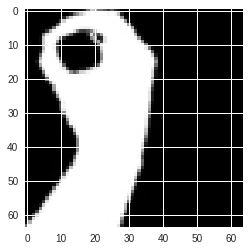

In [0]:
plt.imshow(x_train[5515],cmap='gray')
print(y_train[5515])

In [0]:
x_train = x_train/255
x_test = x_test/255

14


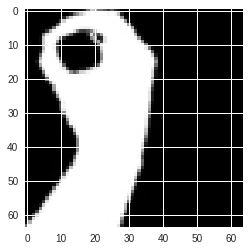

In [0]:
plt.imshow(x_train[5515],cmap='gray')
print(y_train[5515])

In [0]:
y_train = one_hot_matrix(np.squeeze(y_train), classifier).T
y_test = one_hot_matrix(np.squeeze(y_test), classifier).T

In [0]:
x_train = x_train.reshape(x_train.shape[0], 64, 64, 1)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classifier))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# initiate RMSprop optimizer
lr=0.01
epochs = 10
decay = 0.0002
momentum = 0.9
opt = keras.optimizers.sgd(lr=lr, decay=decay,nesterov=False,momentum=momentum )

# Let's train the model using sgd
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
              batch_size = 32,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 35859 samples, validate on 8965 samples
Epoch 1/10
35859/35859 [==============================] - 38s 1ms/step - loss: 0.3036 - acc: 0.9115 - val_loss: 0.0092 - val_acc: 0.9983
Epoch 2/10
35859/35859 [==============================] - 34s 956us/step - loss: 0.0123 - acc: 0.9961 - val_loss: 0.0064 - val_acc: 0.9989
Epoch 3/10
35859/35859 [==============================] - 34s 953us/step - loss: 0.0066 - acc: 0.9980 - val_loss: 0.0049 - val_acc: 0.9993
Epoch 4/10
35859/35859 [==============================] - 34s 947us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0048 - val_acc: 0.9994
Epoch 5/10
35859/35859 [==============================] - 34s 947us/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0046 - val_acc: 0.9996
Epoch 6/10
35859/35859 [==============================] - 34s 947us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0045 - val_acc: 0.9994
Epoch 7/10
35859/35859 [==============================] - 34s 943us/ste

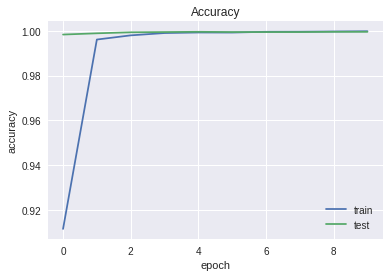

In [0]:
#train1-model1- 64 bs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [0]:
model.save('extended_atoz_2.h5')